In [16]:
import pandas as pd

# Step 1: List of your uploaded CSV files
csv_files = [
    "inputf1_rsrp_with_header.csv",
    "inputf1_cellid_with_header.csv",
    "inputf1_sinr_with_header.csv",
]

# Step 2: Read and merge all files with outer join (keeping everything)
merged_df = pd.DataFrame()

for file in csv_files:
    df = pd.read_csv(file, encoding='latin1')  # try 'cp1252' or 'utf-8' if error occurs
    print(f"Loaded: {file} with shape {df.shape}")
    
    if merged_df.empty:
        merged_df = df
    else:
        merged_df = pd.merge(merged_df, df, how='outer')

# Step 3: Fill missing values with 'NA'
merged_df.fillna("NA", inplace=True)

# Step 4: Save to new CSV
merged_df.to_csv("new_pro.csv", index=False)
print(" Merged dataset saved as 'merged_dataset_full.csv'")


Loaded: inputf1_rsrp_with_header.csv with shape (2949, 6)
Loaded: inputf1_cellid_with_header.csv with shape (2949, 6)
Loaded: inputf1_sinr_with_header.csv with shape (2949, 6)
✅ Merged dataset saved as 'merged_dataset_full.csv'


In [19]:
import pandas as pd

# Step 1: List of your uploaded CSV files
csv_files = [
    "inputf2_rsrp_with_header.csv",
    "inputf2_cellid_with_header.csv",
    "inputf2_sinr_with_header.csv",
]

# Step 2: Read and merge all files with outer join (keeping everything)
merged_df = pd.DataFrame()

for file in csv_files:
    df = pd.read_csv(file, encoding='latin1')  # try 'cp1252' or 'utf-8' if error occurs
    print(f"Loaded: {file} with shape {df.shape}")
    
    if merged_df.empty:
        merged_df = df
    else:
        merged_df = pd.merge(merged_df, df, how='outer')

# Step 3: Fill missing values with 'NA'
merged_df.fillna("NA", inplace=True)

# Step 4: Save to new CSV
merged_df.to_csv("new_NR.csv", index=False)
print(" Merged dataset saved as 'merged_dataset_full.csv'")

Loaded: inputf2_rsrp_with_header.csv with shape (2949, 6)
Loaded: inputf2_cellid_with_header.csv with shape (2949, 6)
Loaded: inputf2_sinr_with_header.csv with shape (2949, 6)
✅ Merged dataset saved as 'merged_dataset_full.csv'


C:\Users\karth\AppData\Local\Temp\ipykernel_9824\2682002263.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NA' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merged_df.fillna("NA", inplace=True)


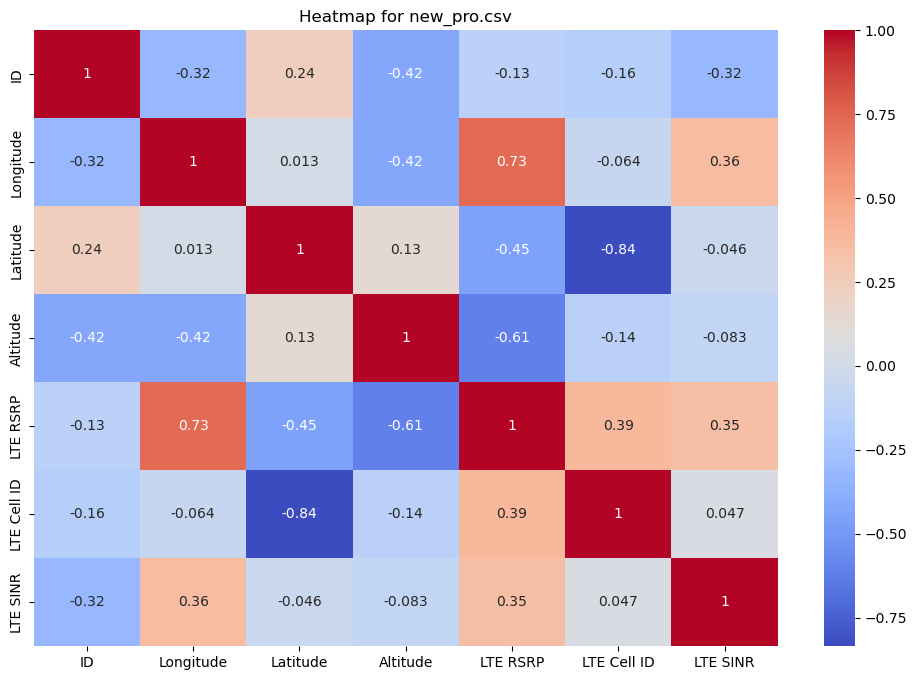

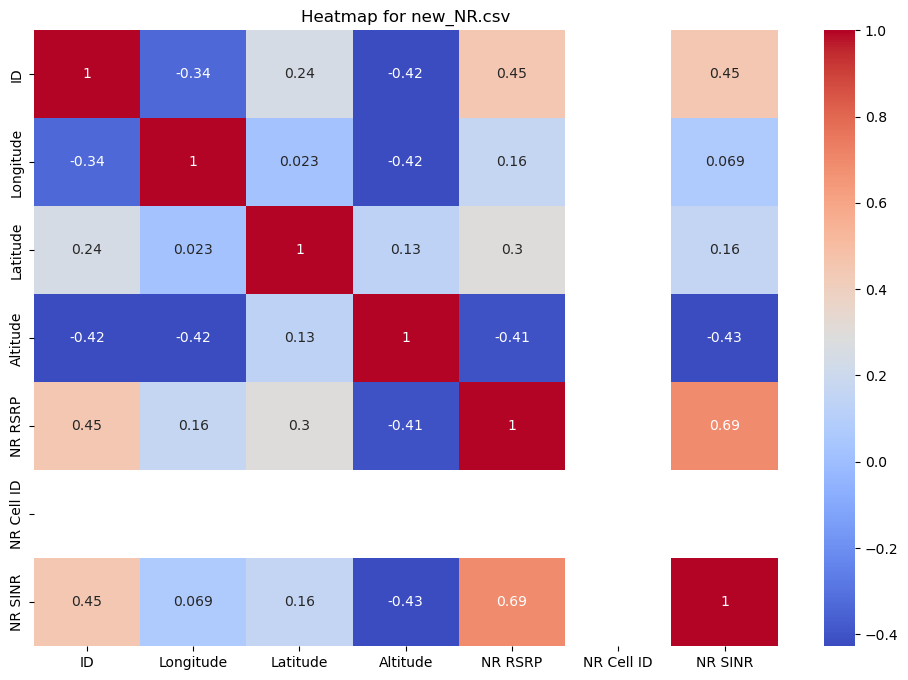


Running ML on new_pro.csv:

Classification Report for LTE SINR:

              precision    recall  f1-score   support

          13       0.67      0.67      0.67         3
          14       1.00      0.73      0.84        11
          15       0.75      0.60      0.67        10
          16       0.84      0.95      0.89        43
          17       0.86      0.93      0.89        55
          18       0.95      0.90      0.92        60
          19       0.93      0.96      0.95        83
          20       0.98      0.97      0.98       127
          21       1.00      0.98      0.99       141
          22       0.98      1.00      0.99       126
          23       0.97      0.99      0.98       153
          24       0.99      0.92      0.95        72
          25       0.00      0.00      0.00         1

    accuracy                           0.96       885
   macro avg       0.84      0.81      0.82       885
weighted avg       0.96      0.96      0.96       885


Running ML o

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Load both datasets
df1 = pd.read_csv('new_pro.csv')
df2 = pd.read_csv('new_NR.csv')

# Preprocessing function
def preprocess(df):
    df = df.copy()
    df = df.dropna(axis=1, how='all')  # drop fully empty columns
    df = df.dropna()  # drop rows with NA
    df = df.select_dtypes(include=['number'])  # use only numerical columns
    return df

df1_clean = preprocess(df1)
df2_clean = preprocess(df2)

# Heatmap function
def plot_heatmap(df, title):
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title(f'Heatmap for {title}')
    plt.show()

# Plot heatmaps
plot_heatmap(df1_clean, "new_pro.csv")
plot_heatmap(df2_clean, "new_NR.csv")

# ML analysis function
def run_ml_pipeline(df, label_column=None):
    df = df.copy()
    if not label_column:
        label_column = df.columns[-1]  # Assume last column is label if not specified
    X = df.drop(columns=[label_column])
    y = df[label_column]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    results = {}

    # Random Forest
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train_scaled, y_train)
    rf_pred = rf.predict(X_test_scaled)
    rf_acc = accuracy_score(y_test, rf_pred)
    results['Random Forest'] = rf_acc

    # Support vector machine , used for classification and regression 
    svm = SVC()
    svm.fit(X_train_scaled, y_train)
    svm_pred = svm.predict(X_test_scaled)
    svm_acc = accuracy_score(y_test, svm_pred)
    results['SVM'] = svm_acc

    print(f"\nClassification Report for {label_column}:\n")
    print(classification_report(y_test, rf_pred))

    return results


print("\nRunning ML on new_pro.csv:")
results1 = run_ml_pipeline(df1_clean)

print("\nRunning ML on new_NR.csv:")
results2 = run_ml_pipeline(df2_clean)

# Compare results
comparison = pd.DataFrame({'new_pro.csv': results1, 'new_NR.csv': results2})
print("\nModel Accuracy Comparison:")
print(comparison)

In [23]:
pip install geopy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


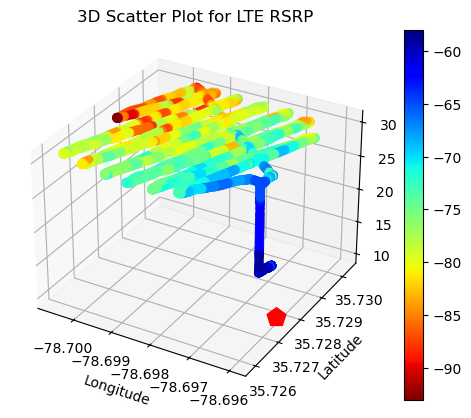

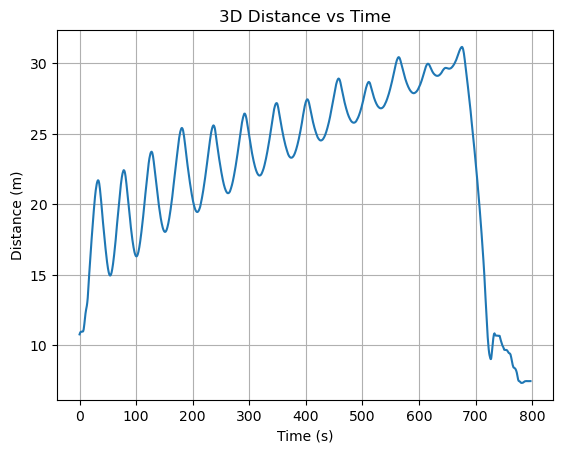

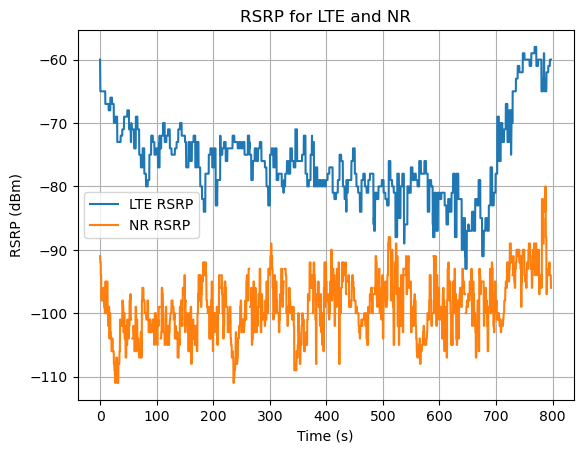

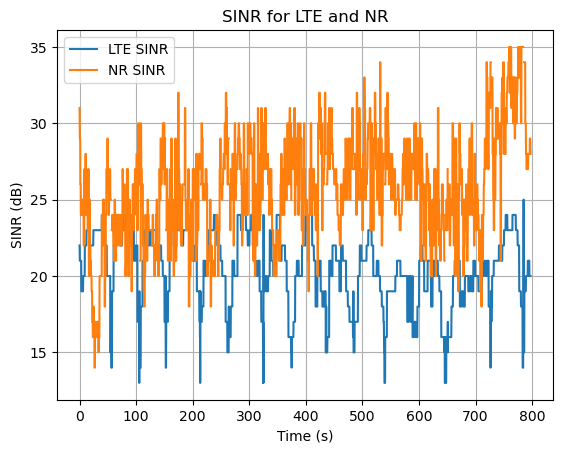

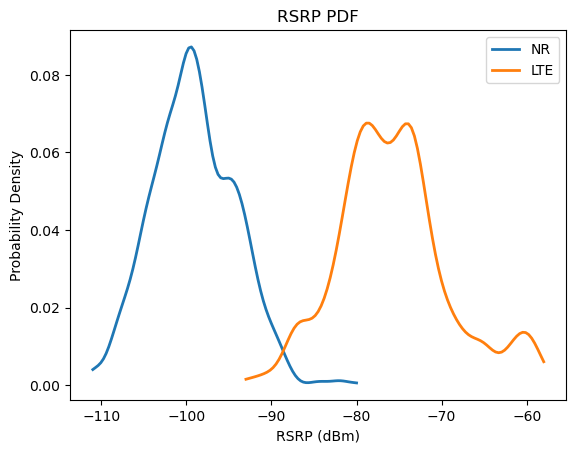

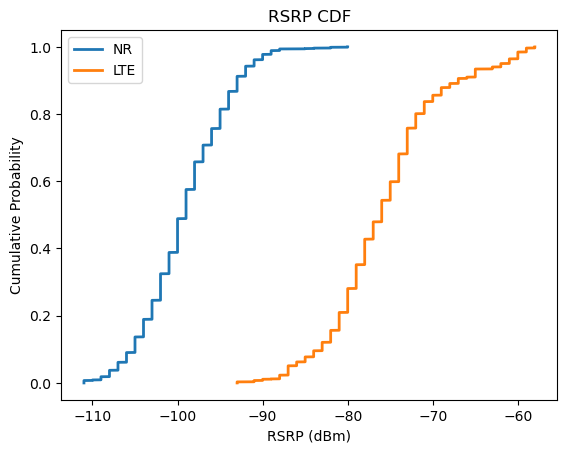

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from geopy.distance import geodesic

# 📍 Set the absolute path where your dataset is stored
DATA_PATH = "C:/Users/karth/Downloads/Ericsson_Amir/Dryad/"

# Reference Location
LW1_long, LW1_lat, LW1_alt = -78.69594208319383, 35.727487047024084, 10

# Load Data Function
def load_data(filename):
    file_path = f"{DATA_PATH}{filename}"  # Using the full path
    df = pd.read_csv(file_path)
    df["Time and date"] = pd.to_datetime(df["Time and date"], format='%Y-%m-%d %H:%M:%S.%f')
    return df

# Load files for yaw 45
throughput_45 = load_data('yaw45/input_throughput_with_header.csv')
LTE_RSRP_45 = load_data('yaw45/inputf1_rsrp_with_header.csv')
LTE_SINR_45 = load_data('yaw45/inputf1_sinr_with_header.csv')
NR_RSRP_45 = load_data('yaw45/inputf2_rsrp_with_header.csv')
NR_SINR_45 = load_data('yaw45/inputf2_sinr_with_header.csv')

# 📌 Clean Data (Remove NaNs/Infs)
def clean_data(series):
    series = series.dropna()
    series = series[~np.isinf(series)]
    return series

RSRP_NR = clean_data(NR_RSRP_45["NR RSRP"])
RSRP_LTE = clean_data(LTE_RSRP_45["LTE RSRP"])



# 📌 3D Scatter Plot for RSRP (LTE)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(LTE_RSRP_45["Longitude"], LTE_RSRP_45["Latitude"], LTE_RSRP_45["Altitude"], 
                      c=LTE_RSRP_45["LTE RSRP"], cmap='jet_r', s=36)
ax.scatter(LW1_long, LW1_lat, LW1_alt, color='r', marker='p', s=200)  # Reference point
plt.colorbar(scatter)
ax.set_xlabel('Longitude'); ax.set_ylabel('Latitude'); ax.set_zlabel('Altitude')
ax.set_title('3D Scatter Plot for LTE RSRP')
plt.show()


# 📌 Compute Distance from Reference Point
def compute_distance(df):
    distances = [geodesic((lat, lon), (LW1_lat, LW1_long)).meters for lat, lon in zip(df["Latitude"], df["Longitude"])]
    vertical_dist = abs(df["Altitude"] - LW1_alt)
    return np.sqrt(np.array(distances)*2 + np.array(vertical_dist)*2)

NR_time = NR_RSRP_45["Time and date"]
time_diffs_NR = (NR_time - NR_time.iloc[0]).dt.total_seconds()

total_dist_NR = compute_distance(NR_RSRP_45)

# 📌 Plot Distance vs Time (NR)
plt.figure()
plt.plot(time_diffs_NR, total_dist_NR)
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')
plt.title('3D Distance vs Time')
plt.grid()
plt.show()

# 📌 RSRP vs Time for LTE and NR
time_diffs_LTE = (LTE_RSRP_45["Time and date"] - LTE_RSRP_45["Time and date"].iloc[0]).dt.total_seconds()
plt.figure()
plt.plot(time_diffs_LTE, LTE_RSRP_45["LTE RSRP"], label="LTE RSRP")
plt.plot(time_diffs_NR, NR_RSRP_45["NR RSRP"], label="NR RSRP")
plt.xlabel("Time (s)")
plt.ylabel("RSRP (dBm)")
plt.title("RSRP for LTE and NR")
plt.legend()
plt.grid()
plt.show()

# 📌 SINR vs Time
time_diffs_LTE_SINR = (LTE_SINR_45["Time and date"] - LTE_SINR_45["Time and date"].iloc[0]).dt.total_seconds()
time_diffs_NR_SINR = (NR_SINR_45["Time and date"] - NR_SINR_45["Time and date"].iloc[0]).dt.total_seconds()

plt.figure()
plt.plot(time_diffs_LTE_SINR, LTE_SINR_45["LTE SINR"], label="LTE SINR")
plt.plot(time_diffs_NR_SINR, NR_SINR_45["NR SINR"], label="NR SINR")
plt.xlabel("Time (s)")
plt.ylabel("SINR (dB)")
plt.title("SINR for LTE and NR")
plt.legend()
plt.grid()
plt.show()

# 📌 PDF & CDF of RSRP (with cleaned data)
fig, ax = plt.subplots()

x_vals_NR = np.linspace(min(RSRP_NR), max(RSRP_NR), 100)
ax.plot(x_vals_NR, gaussian_kde(RSRP_NR)(x_vals_NR), label="NR", linewidth=2)

x_vals_LTE = np.linspace(min(RSRP_LTE), max(RSRP_LTE), 100)
ax.plot(x_vals_LTE, gaussian_kde(RSRP_LTE)(x_vals_LTE), label="LTE", linewidth=2)

ax.set_title("RSRP PDF")
ax.set_xlabel("RSRP (dBm)")
ax.set_ylabel("Probability Density")
ax.legend()
plt.show()

# 📌 CDF
fig, ax = plt.subplots()
sorted_NR = np.sort(RSRP_NR)
sorted_LTE = np.sort(RSRP_LTE)

ax.plot(sorted_NR, np.arange(len(sorted_NR))/len(sorted_NR), label="NR", linewidth=2)
ax.plot(sorted_LTE, np.arange(len(sorted_LTE))/len(sorted_LTE), label="LTE", linewidth=2)

ax.set_title("RSRP CDF")
ax.set_xlabel("RSRP (dBm)")
ax.set_ylabel("Cumulative Probability")
ax.legend()
plt.show()

In [4]:
import folium
from folium.plugins import AntPath
from IPython.display import display

# --- 📌 Merge NR RSRP and SINR for time-based analysis ---
merged_NR = pd.merge_asof(
    NR_RSRP_45.sort_values("Time and date"),
    NR_SINR_45.sort_values("Time and date"),
    on="Time and date"
)

# Add coordinates to merged data
merged_NR["Latitude"] = NR_RSRP_45["Latitude"].values
merged_NR["Longitude"] = NR_RSRP_45["Longitude"].values

# Compute time in seconds
merged_NR["Time (s)"] = (merged_NR["Time and date"] - merged_NR["Time and date"].iloc[0]).dt.total_seconds()

# Thresholds for analysis
LOW_RSRP_THRESHOLD = -100  # dBm
HIGH_SINR_THRESHOLD = 25   # dB

# Flag condition
merged_NR["Condition"] = (
    (merged_NR["NR RSRP"] < LOW_RSRP_THRESHOLD) & 
    (merged_NR["NR SINR"] > HIGH_SINR_THRESHOLD)
)

# Print diagnosis summary
print("\n📋 Diagnostic Report: NR Low RSRP but High SINR")
segments = merged_NR[merged_NR["Condition"]]
if not segments.empty:
    for _, row in segments.iterrows():
        print(f"⏱ Time {int(row['Time (s)'])}s → RSRP: {row['NR RSRP']} dBm | SINR: {row['NR SINR']} dB → Likely Reason: Low signal power but clean channel (e.g., low interference or beamforming benefit).")
else:
    print("✅ No significant RSRP-SINR divergence detected.")

# --- 🌍 Geospatial Map Visualization of Signal Conditions ---
# Set up Folium map at starting point
start_point = [merged_NR.iloc[0]["Latitude"], merged_NR.iloc[0]["Longitude"]]
m = folium.Map(location=start_point, zoom_start=14)

# Full NR signal trace
signal_path = list(zip(merged_NR["Latitude"], merged_NR["Longitude"]))
AntPath(signal_path, color='blue', weight=3, delay=1000).add_to(m)

# Add all points: normal or problematic
for _, row in merged_NR.iterrows():
    location = [row["Latitude"], row["Longitude"]]
    time = row["Time (s)"]
    rsrp = row["NR RSRP"]
    sinr = row["NR SINR"]
    popup = f"⏱ {int(time)}s<br>RSRP: {rsrp:.1f} dBm<br>SINR: {sinr:.1f} dB"
    
    if row["Condition"]:
        reason = "🛑 Low RSRP & High SINR<br>Likely low interference or beamforming benefit"
        icon = folium.Icon(color="red", icon="exclamation-sign")
    else:
        reason = "✅ Normal signal condition"
        icon = folium.Icon(color="green", icon="ok-sign")
        
    folium.Marker(location=location, popup=popup + "<br>" + reason, icon=icon).add_to(m)

# Display map
display(m)



📋 Diagnostic Report: NR Low RSRP but High SINR
⏱ Time 47s → RSRP: -105.0 dBm | SINR: 27.0 dB → Likely Reason: Low signal power but clean channel (e.g., low interference or beamforming benefit).
⏱ Time 47s → RSRP: -105.0 dBm | SINR: 27.0 dB → Likely Reason: Low signal power but clean channel (e.g., low interference or beamforming benefit).
⏱ Time 47s → RSRP: -105.0 dBm | SINR: 27.0 dB → Likely Reason: Low signal power but clean channel (e.g., low interference or beamforming benefit).
⏱ Time 48s → RSRP: -101.0 dBm | SINR: 27.0 dB → Likely Reason: Low signal power but clean channel (e.g., low interference or beamforming benefit).
⏱ Time 48s → RSRP: -101.0 dBm | SINR: 27.0 dB → Likely Reason: Low signal power but clean channel (e.g., low interference or beamforming benefit).
⏱ Time 48s → RSRP: -101.0 dBm | SINR: 27.0 dB → Likely Reason: Low signal power but clean channel (e.g., low interference or beamforming benefit).
⏱ Time 49s → RSRP: -102.0 dBm | SINR: 29.0 dB → Likely Reason: Low sig

In [3]:
print("RSRP Columns:", LTE_RSRP_45.columns.tolist())
print("SINR Columns:", LTE_SINR_45.columns.tolist())


RSRP Columns: ['ID', 'Time and date', 'Longitude', 'Latitude', 'Altitude', 'LTE RSRP']
SINR Columns: ['ID', 'Time and date', 'Longitude', 'Latitude', 'Altitude', 'LTE SINR']


In [1]:
import pandas as pd
import folium
from geopy.distance import geodesic
import numpy as np
from IPython.display import display

# Load and clean the data
df = pd.read_csv("new_pro.csv")
df.columns = df.columns.str.strip()

# Rename columns
df.rename(columns={
    "Time and date": "Time",
    "LTE RSRP": "RSRP",
    "LTE SINR": "SINR",
    "LTE Cell ID": "CellID"
}, inplace=True)

# Filter necessary columns
required_cols = ['Time', 'Latitude', 'Longitude', 'Altitude', 'CellID']
df = df[[col for col in required_cols if col in df.columns]].dropna().copy()
df['Time'] = pd.to_datetime(df['Time'])
df.sort_values("Time", inplace=True)

# Calculate 3D distance
def distance_3d(p1, p2):
    ground = geodesic((p1['Latitude'], p1['Longitude']), (p2['Latitude'], p2['Longitude'])).meters
    alt_diff = abs(p1['Altitude'] - p2['Altitude'])
    return np.sqrt(ground**2 + alt_diff**2)

total_distance = 0
for i in range(1, len(df)):
    total_distance += distance_3d(df.iloc[i-1], df.iloc[i])

print(f"🛰️ Total 3D Distance Travelled: {total_distance:.2f} meters")

# Create folium map
center = [df['Latitude'].mean(), df['Longitude'].mean()]
m = folium.Map(location=center, zoom_start=15)

# UAV trajectory path
path = df[['Latitude', 'Longitude']].values.tolist()
folium.PolyLine(path, color="blue", weight=4, opacity=0.6).add_to(m)

# Start and End markers
folium.Marker(path[0], popup="Start", icon=folium.Icon(color='green')).add_to(m)
folium.Marker(path[-1], popup="End", icon=folium.Icon(color='red')).add_to(m)

# Add handover markers (Cell ID change)
handover_mask = df['CellID'].ne(df['CellID'].shift())
handover_points = df[handover_mask]

for _, row in handover_points.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Handover → Cell {row['CellID']}<br>Time: {row['Time']}",
        icon=folium.Icon(color='orange', icon='info-sign')
    ).add_to(m)

# Display map (inline if notebook / opens if script)
try:
    display(m)  # For notebooks like Jupyter
except:
    m._repr_html_()  # Opens in browser for scripts


🛰️ Total 3D Distance Travelled: 6521.41 meters


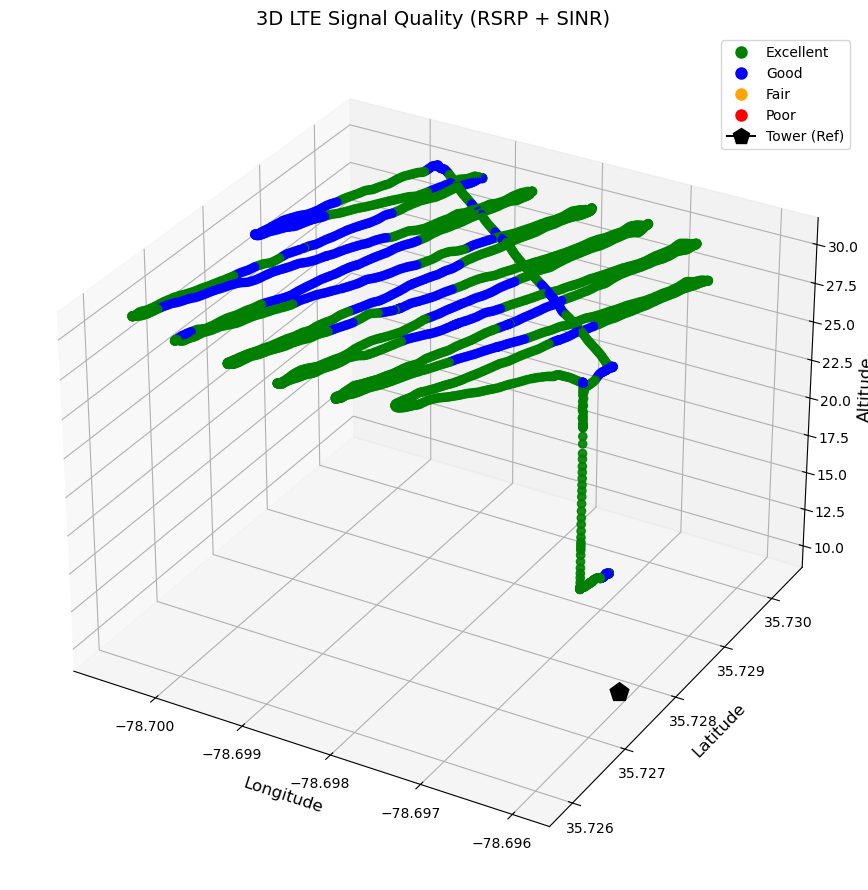

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

# Load your data
DATA_PATH = "C:/Users/karth/Downloads/Ericsson_Amir/Dryad/"
LW1_long, LW1_lat, LW1_alt = -78.69594208319383, 35.727487047024084, 10

def load_data(filename):
    file_path = f"{DATA_PATH}{filename}"
    df = pd.read_csv(file_path)
    df["Time and date"] = pd.to_datetime(df["Time and date"], format='%Y-%m-%d %H:%M:%S.%f')
    return df

LTE_RSRP_45 = load_data('yaw45/inputf1_rsrp_with_header.csv')
LTE_SINR_45 = load_data('yaw45/inputf1_sinr_with_header.csv')

# Merge
merged = pd.merge(LTE_RSRP_45, LTE_SINR_45, on=["Time and date", "Longitude", "Latitude", "Altitude"])
merged = merged.replace([np.inf, -np.inf], np.nan).dropna(subset=["LTE RSRP", "LTE SINR"])

# Signal classification
def classify_signal(rsrp, sinr):
    if rsrp >= -90 and sinr >= 20:
        return "Excellent"
    elif rsrp >= -100 and sinr >= 13:
        return "Good"
    elif rsrp >= -110 and sinr >= 0:
        return "Fair"
    else:
        return "Poor"

merged["Signal Quality"] = merged.apply(lambda row: classify_signal(row["LTE RSRP"], row["LTE SINR"]), axis=1)

# Color mapping
color_map = {
    "Excellent": "green",
    "Good": "blue",
    "Fair": "orange",
    "Poor": "red"
}
merged["Color"] = merged["Signal Quality"].map(color_map)

# 🎨 3D Scatter Plot
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Scatter Plot
sc = ax.scatter(
    merged["Longitude"], 
    merged["Latitude"], 
    merged["Altitude"], 
    c=merged["Color"], s=35, alpha=0.9
)

# Tower Point
ax.scatter(LW1_long, LW1_lat, LW1_alt, color='black', marker='p', s=200, label='Tower (Ref)')

# Labeling
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
ax.set_zlabel("Altitude", fontsize=12)
ax.set_title("3D LTE Signal Quality (RSRP + SINR)", fontsize=14)

# Custom Legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Excellent', markerfacecolor='green', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Good', markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Fair', markerfacecolor='orange', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Poor', markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='p', color='black', label='Tower (Ref)', markerfacecolor='black', markersize=12)
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()


In [19]:
pip install folium


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [21]:
import folium
from folium.plugins import HeatMap
from IPython.display import display  # For inline display in Jupyter or VS Code notebooks

# 📌 Filter out rows with NaNs or Infs in Latitude, Longitude, and RSRP
valid_data = LTE_RSRP_45[["Latitude", "Longitude", "LTE RSRP"]].dropna()
valid_data = valid_data[
    ~np.isinf(valid_data["Latitude"]) & 
    ~np.isinf(valid_data["Longitude"]) & 
    ~np.isinf(valid_data["LTE RSRP"])
]

# 📌 Normalize LTE RSRP to 0–1 scale for heat intensity
min_rsrp = valid_data["LTE RSRP"].min()
max_rsrp = valid_data["LTE RSRP"].max()
valid_data["Normalized RSRP"] = (valid_data["LTE RSRP"] - min_rsrp) / (max_rsrp - min_rsrp)

# 📌 Initialize folium map centered around the mean coordinates
map_center = [valid_data["Latitude"].mean(), valid_data["Longitude"].mean()]
rsrp_map = folium.Map(location=map_center, zoom_start=16, tiles='cartodbpositron')

# 📌 Add heatmap layer
heat_data = [
    [row["Latitude"], row["Longitude"], row["Normalized RSRP"]] 
    for _, row in valid_data.iterrows()
]
HeatMap(heat_data, radius=10, max_zoom=18).add_to(rsrp_map)

# 📌 Add reference marker
folium.Marker(
    location=[LW1_lat, LW1_long],
    popup="Reference Point (LW1)",
    icon=folium.Icon(color='red', icon='info-sign')
).add_to(rsrp_map)

# 📌 Display the map inline
display(rsrp_map)
